In [83]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import f

import matplotlib.pyplot as plt


from statsmodels.tsa.tsatools import lagmat
import statsmodels.api as sm



# from statsmodels.sandbox.regression.gmm import IV2SLS

# from statsmodels.sandbox.regression.gmm import IVRegressionResults
from linearmodels import IV2SLS



In [73]:
data = pd.read_excel('SP500Index.xlsx')

data['time'] = range(0, len(data))
data['lgSP'] = np.log(data['Level of the S&P 500 Index']/55.61)


theta_mle = data.tail(1)['lgSP'].values/data.tail(1)['time'].values
theta_mle =theta_mle[0]

data['L1.lgSP'] = data['lgSP'].shift(1)
data['L1.diff'] = (- data['L1.lgSP'] + data['lgSP'] - theta_mle)**2

sigma_mle = np.mean(data['L1.diff'].dropna())

In [75]:
print('MLE of theta is: ', theta_mle)
print('MLE of sigma  is: ', np.sqrt(sigma_mle))

MLE of theta is:  0.005548394684384916
MLE of sigma  is:  0.043615597315755754


In [81]:
data.columns

Index(['Date of Observation', 'Level of the S&P 500 Index', 'time', 'lgSP',
       'L1.lgSP', 'L1.diff'],
      dtype='object')

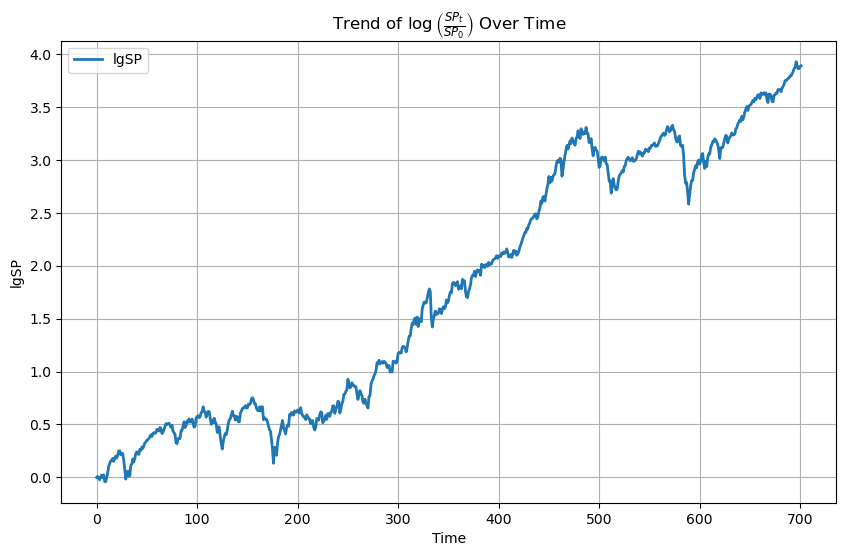

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['lgSP'], label='lgSP', linewidth=2)
plt.title(r'Trend of $\log\left(\frac{SP_t}{SP_0}\right)$ Over Time')
plt.xlabel('Time')
plt.ylabel('lgSP')
plt.grid(True)
plt.legend()
plt.show()